In [16]:
import numpy as np
import pandas as pd
import ast
from collections import Counter
import os
import json
from pandas.io.json import json_normalize
import unicodedata
import re
from matplotlib import pyplot as plt


In [17]:
cd Project

[WinError 2] The system cannot find the file specified: 'Project'
C:\Project


In [18]:
## load data
train = pd.read_csv('train.csv')

Text(0.5,1,'Log Revenue vs popularity')

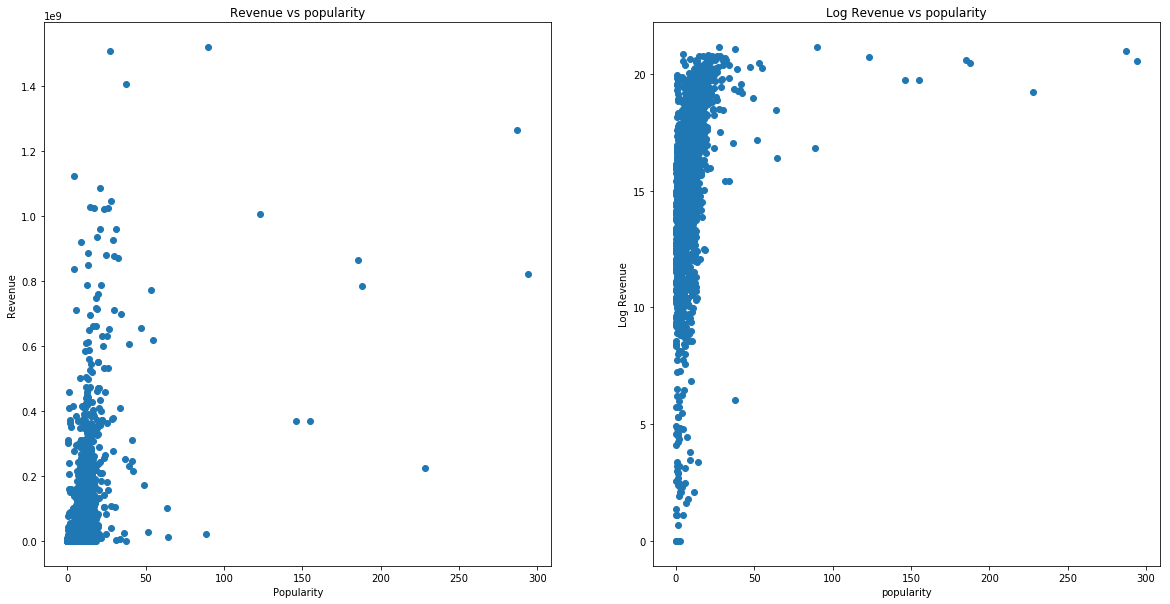

In [19]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(train['popularity'], train['revenue'])
plt.title('Revenue vs popularity')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

plt.subplot(1, 2, 2)
plt.scatter(train['popularity'], np.log(train['revenue']))
plt.xlabel('popularity')
plt.ylabel('Log Revenue')
plt.title('Log Revenue vs popularity')

Text(0.5,1,'Log Revenue vs Runtime')

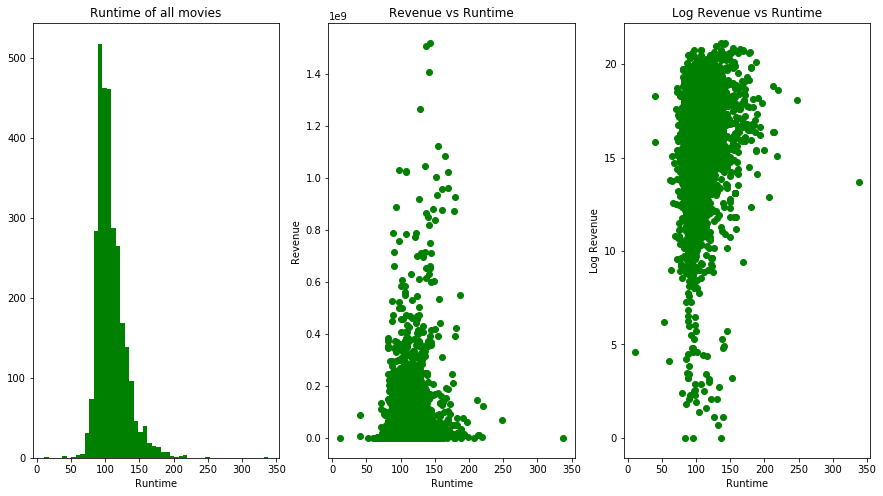

In [31]:
df = train[train['runtime'].notna()]
df = train[train['runtime']>0]

plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.hist(df['runtime'],50, facecolor='g')
plt.xlabel('Runtime')
plt.title('Runtime of all movies')

plt.subplot(1, 3, 2)
plt.scatter(df['runtime'], df['revenue'] , c = 'g')
plt.title('Revenue vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('Revenue')

plt.subplot(1, 3, 3)
plt.scatter((df['runtime']), np.log(df['revenue']),c = 'g')
plt.xlabel('Runtime')
plt.ylabel('Log Revenue')
plt.title('Log Revenue vs Runtime')

In [32]:
def cast_preproccessing(train):
    cast_list = []
    male = 0
    female = 0
    Hero_male = 0
    Hero_female = 0

    for x in train['cast']:
        try:
            for item in ast.literal_eval(x):
                cast_list.append(item['name'])

                if item['order'] == 0:
                    if item['gender'] == 1:
                        Hero_female += 1
                    elif item['gender'] == 2:
                        Hero_male += 1

                if item['gender'] == 1:
                    female += 1
                elif item['gender'] == 2:
                    male += 1
        except:
            continue
    return cast_list,male,female,Hero_male,Hero_female


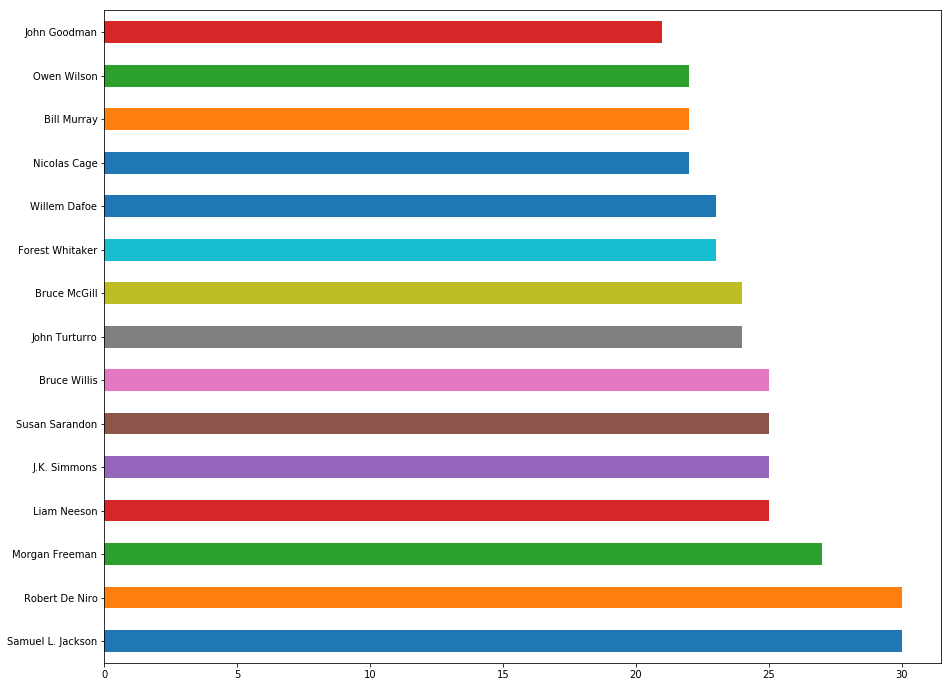

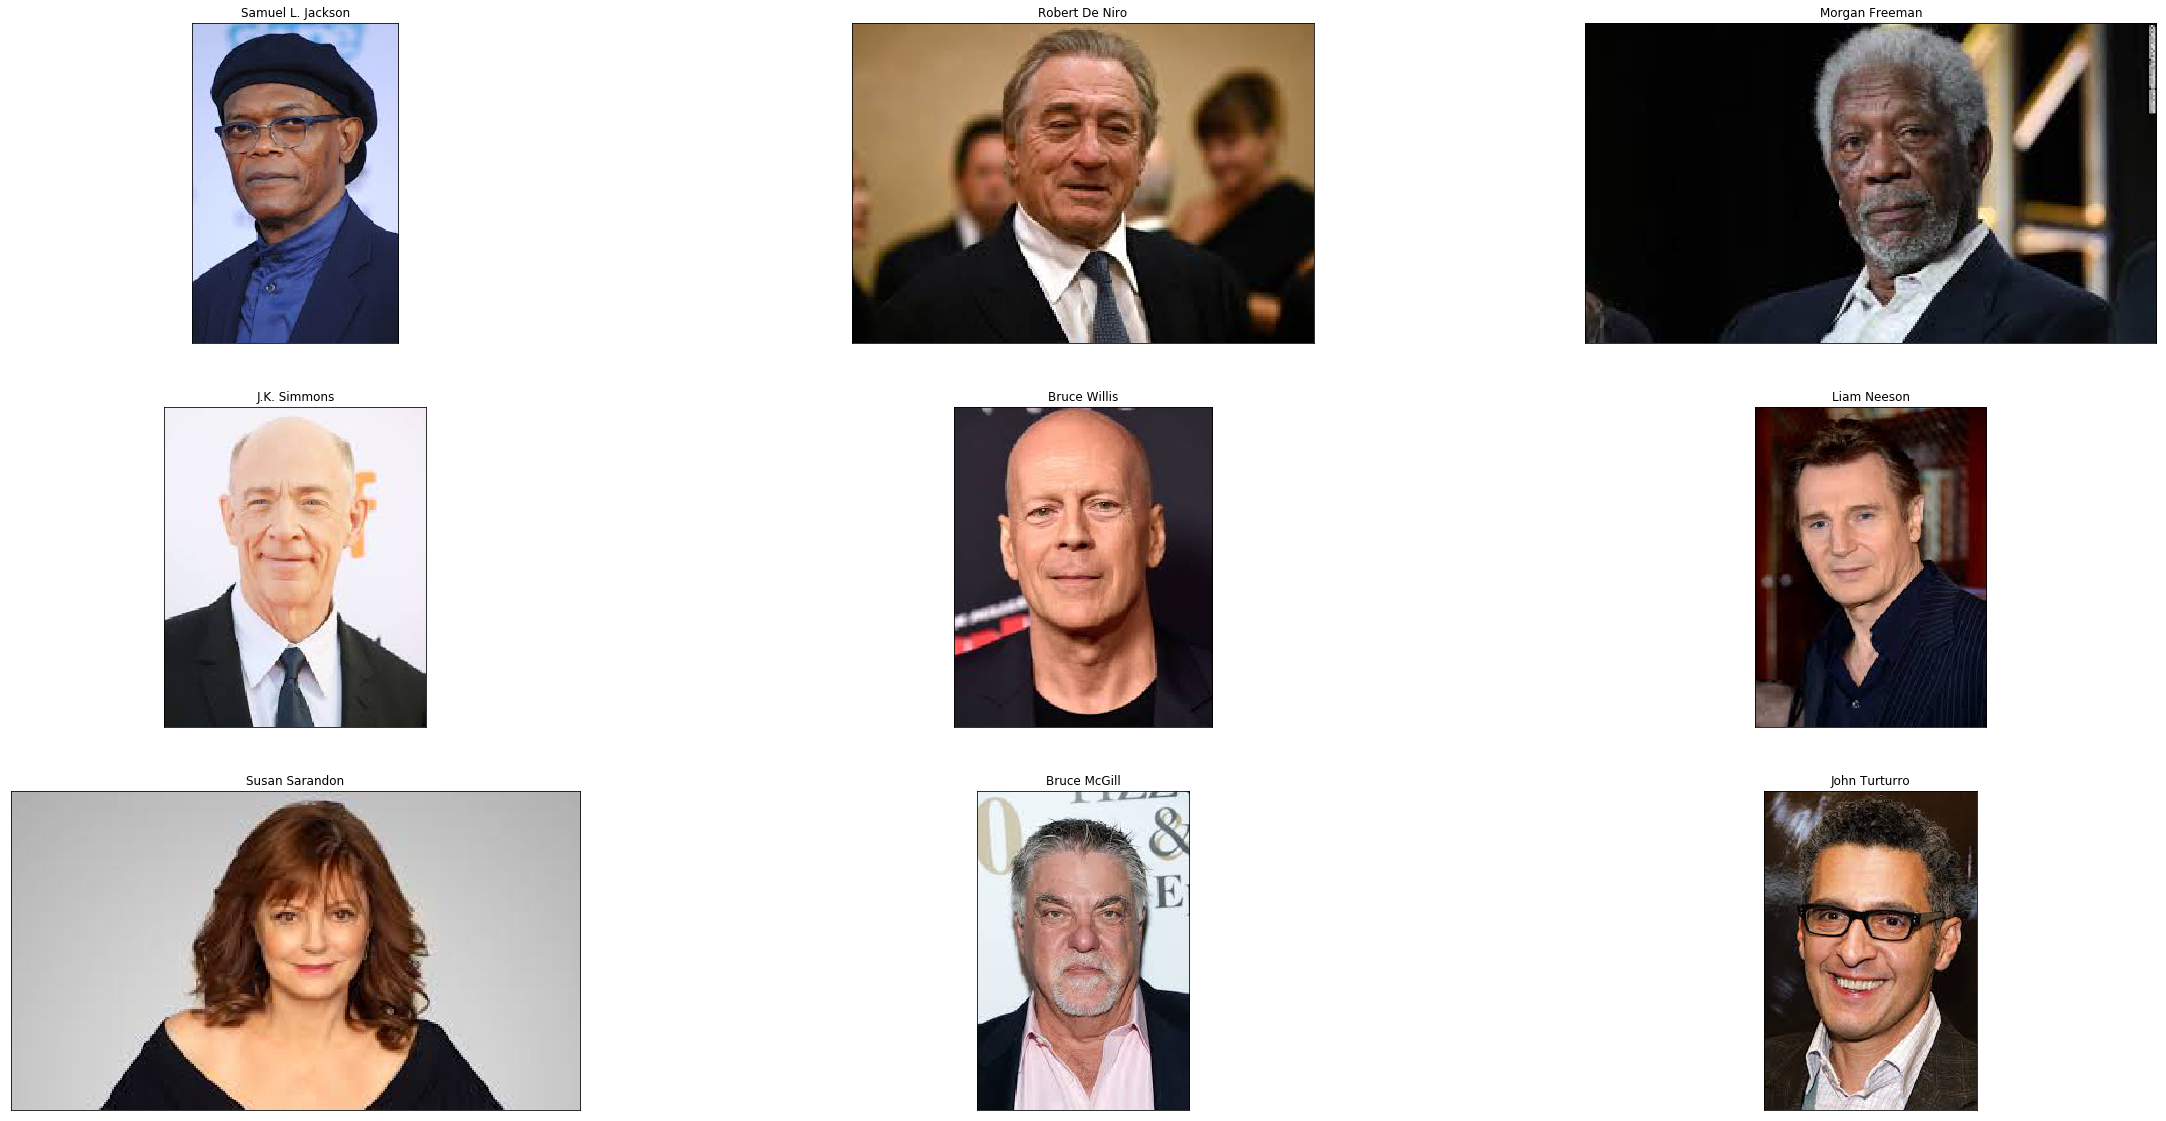

In [33]:
cast_list,male,female,Hero_male,Hero_female = cast_preproccessing(train)
plot_freq = pd.Series(cast_list).value_counts()
plt.figure(figsize=(15, 12))
plot_freq[:15].plot(kind = 'barh')


c=Counter(cast_list)
list_freq = [i[0] for i in c.most_common(50)]

fig = plt.figure(figsize=(40, 20))
j=1
for i in list_freq[:9]:
    ax = fig.add_subplot(3, 3, j, xticks=[], yticks=[])
    j+=1
    img=plt.imread(('actors/'+i+'.jpg'))
    plt.imshow(img)
    ax.set_title(i)

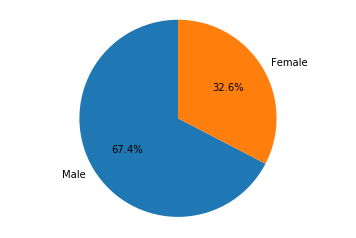

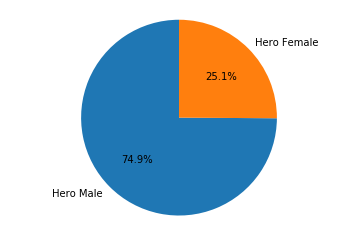

In [34]:
labels = 'Male', 'Female'
sizes = [male, female]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

labels = 'Hero Male', 'Hero Female'
sizes = [Hero_male, Hero_female]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [35]:

def is_famous(df):
    cast_list = cast_preproccessing(train)
    c=Counter(cast_list[0])
    list_freq = [i[0] for i in c.most_common(50)]
    for i in list_freq[:9]:
        df[i] = 0
    df['is Famous'] = 0
    for idx, row in df.iterrows():
        try:
            for item in ast.literal_eval(row['cast']):
                if item['name'] in list_freq:
                    df['is Famous'][idx]=1
                if item['name'] in list_freq[:9]:
                    df[item['name']][idx]=1
        except:
            continue
    return df

is_famous(train);

E:\atmel\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
E:\atmel\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


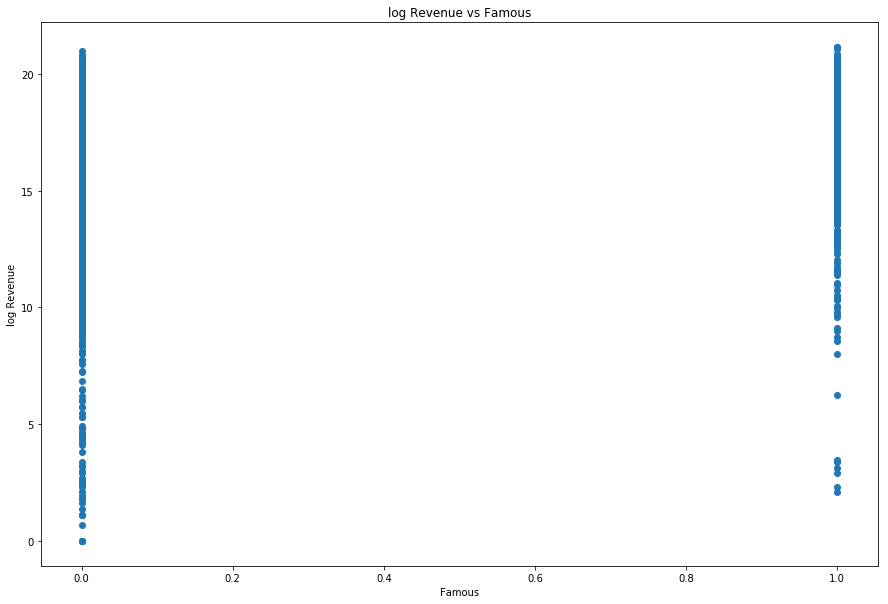

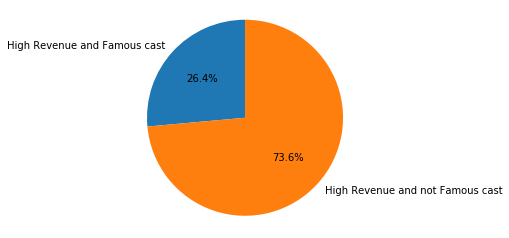

In [36]:
plt.figure(figsize=(15, 10))
plt.scatter(train['is Famous'], np.log(train['revenue']))
plt.title('log Revenue vs Famous')
plt.xlabel('Famous')
plt.ylabel('log Revenue')

RF = train.loc[(np.log(train['revenue'])>10) & (train['is Famous']==1)].shape[0]
RnF = train.loc[(np.log(train['revenue'])>10) & (train['is Famous']==0)].shape[0]
N = RF+RnF
labels = 'High Revenue and Famous cast', 'High Revenue and not Famous cast'
sizes = [RF/N, RnF/N]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


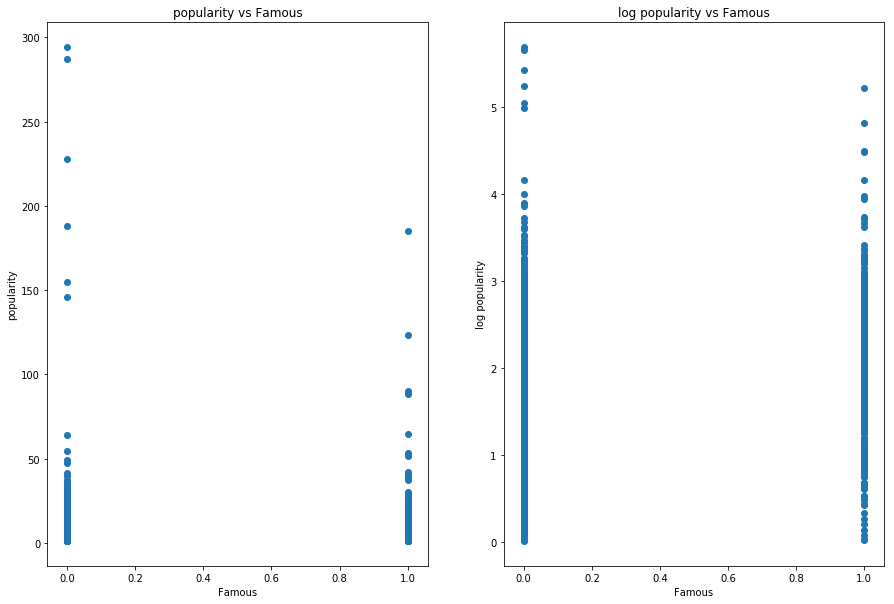

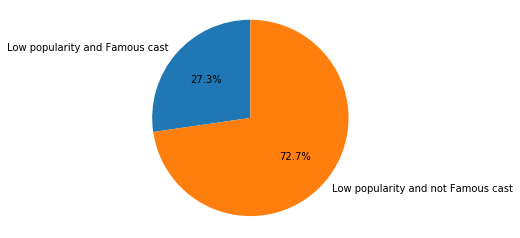

In [13]:
df1 = train.loc[train['popularity']>1]

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.scatter(df1['is Famous'], df1['popularity'])
plt.title('popularity vs Famous')
plt.xlabel('Famous')
plt.ylabel('popularity')

plt.subplot(1, 2, 2)
plt.scatter(df1['is Famous'], np.log(df1['popularity']))
plt.title('log popularity vs Famous')
plt.xlabel('Famous')
plt.ylabel('log popularity')

RF = train.loc[(np.log(df1['popularity'])<3) & (train['is Famous']==1)].shape[0]
RnF = train.loc[(np.log(df1['popularity'])<3) & (train['is Famous']==0)].shape[0]
N = RF+RnF
labels = 'Low popularity and Famous cast', 'Low popularity and not Famous cast'
sizes = [RF/N, RnF/N]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

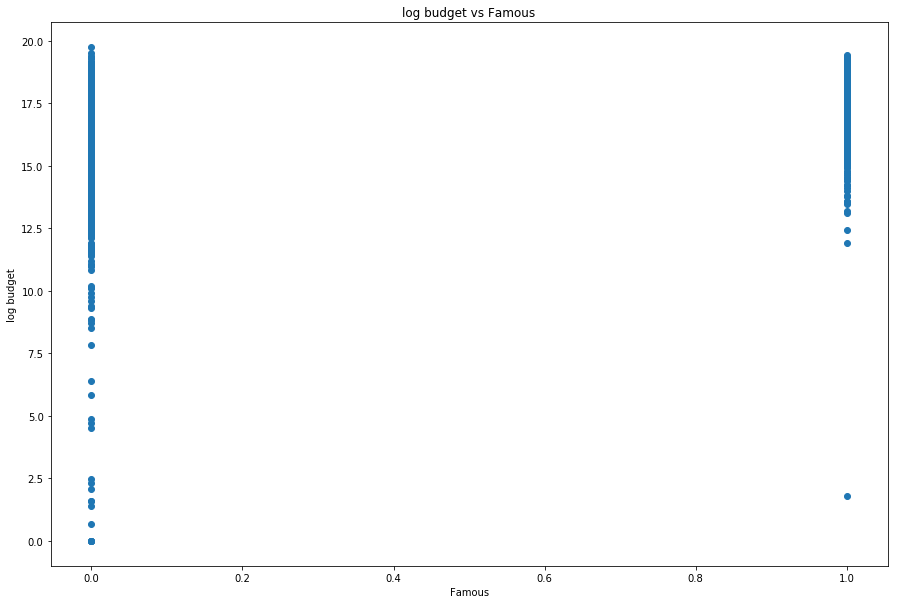

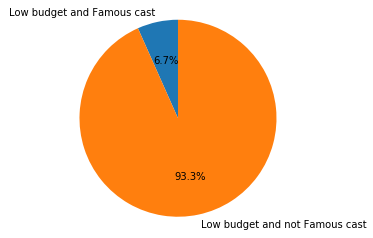

In [14]:
df2 = train.loc[train['budget']>0]

plt.figure(figsize=(15, 10))

plt.scatter(df2['is Famous'], np.log(df2['budget']))
plt.title('log budget vs Famous')
plt.xlabel('Famous')
plt.ylabel('log budget')

RF = train.loc[(np.log(df2['budget'])<15) & (train['is Famous']==1)].shape[0]
RnF = train.loc[(np.log(df2['budget'])<15) & (train['is Famous']==0)].shape[0]
N = RF+RnF
labels = 'Low budget and Famous cast', 'Low budget and not Famous cast'
sizes = [RF/N, RnF/N]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

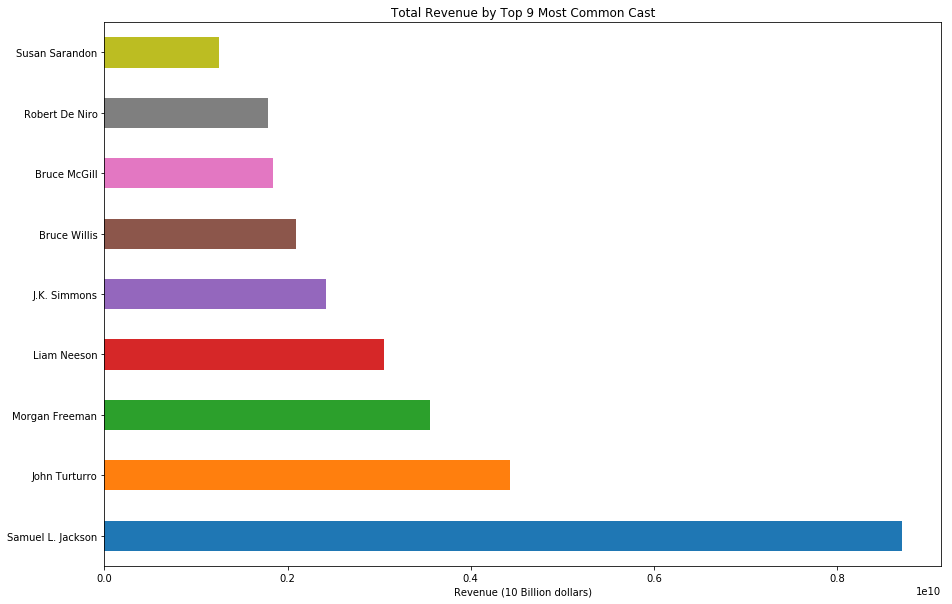

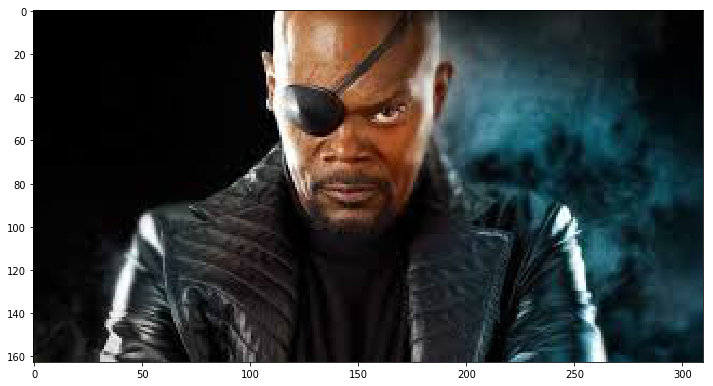

In [10]:

cast_name_Samuel_L_Jackson_revenue=train.loc[train['Samuel L. Jackson']==1,].sum()['revenue']
cast_name_Robert_De_Niro_revenue=train.loc[train['Robert De Niro']==1,].sum()['revenue']
cast_name_Morgan_Freeman_revenue=train.loc[train['Morgan Freeman']==1,].sum()['revenue']
cast_name_JKSimmons_revenue=train.loc[train['J.K. Simmons']==1,].sum()['revenue']
cast_name_Bruce_Willis_revenue=train.loc[train['Bruce Willis']==1,].sum()['revenue']
cast_name_Liam_Neeson_revenue=train.loc[train['Liam Neeson']==1,].sum()['revenue']
cast_name_Susan_Sarandon_revenue=train.loc[train['Susan Sarandon']==1,].sum()['revenue']
cast_name_Bruce_McGill_revenue=train.loc[train['Bruce McGill']==1,].sum()['revenue']
cast_name_John_Turturro_revenue=train.loc[train['John Turturro']==1,].sum()['revenue']


cast_revenue= pd.Series([cast_name_Samuel_L_Jackson_revenue,cast_name_Robert_De_Niro_revenue,
                                cast_name_Morgan_Freeman_revenue,cast_name_JKSimmons_revenue,
                                cast_name_Bruce_Willis_revenue,cast_name_Liam_Neeson_revenue,
                                 cast_name_Susan_Sarandon_revenue,cast_name_Bruce_McGill_revenue,
                                cast_name_John_Turturro_revenue])
cast_revenue.index=['Samuel L. Jackson','Robert De Niro','Morgan Freeman','J.K. Simmons','Bruce Willis',
                           'Liam Neeson','Susan Sarandon','Bruce McGill',
                            'John Turturro']


fig = plt.figure(figsize=(15, 10))
cast_revenue.sort_values(ascending=False).plot(kind='barh',title='Total Revenue by Top 9 Most Common Cast')
plt.xlabel('Revenue (10 Billion dollars)')


fig = plt.figure(figsize=(12, 9))
img=plt.imread('actors/Samual.jpg')
plt.imshow(img)

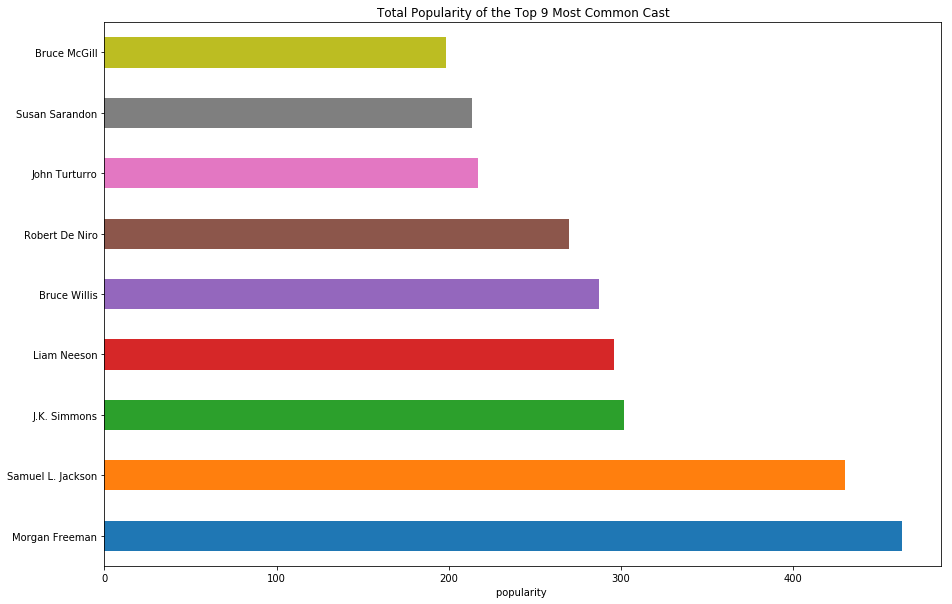

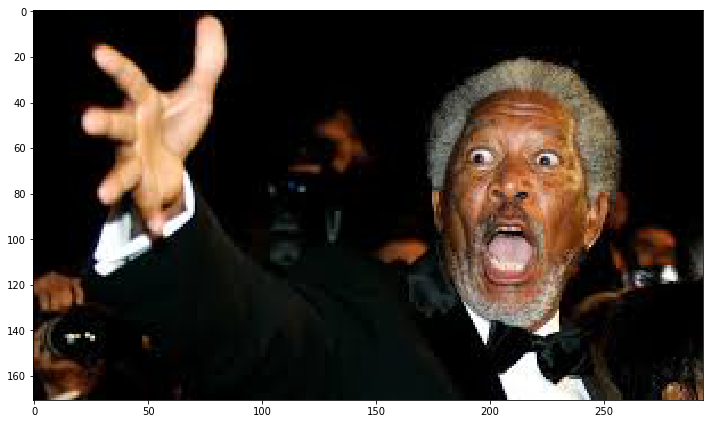

In [21]:

cast_name_Samuel_L_Jackson_popularity=train.loc[train['Samuel L. Jackson']==1,].sum()['popularity']
cast_name_Robert_De_Niro_popularity=train.loc[train['Robert De Niro']==1,].sum()['popularity']
cast_name_Morgan_Freeman_popularity=train.loc[train['Morgan Freeman']==1,].sum()['popularity']
cast_name_JKSimmons_popularity=train.loc[train['J.K. Simmons']==1,].sum()['popularity']
cast_name_Bruce_Willis_popularity=train.loc[train['Bruce Willis']==1,].sum()['popularity']
cast_name_Liam_Neeson_popularity=train.loc[train['Liam Neeson']==1,].sum()['popularity']
cast_name_Susan_Sarandon_popularity=train.loc[train['Susan Sarandon']==1,].sum()['popularity']
cast_name_Bruce_McGill_popularity=train.loc[train['Bruce McGill']==1,].sum()['popularity']
cast_name_John_Turturro_popularity=train.loc[train['John Turturro']==1,].sum()['popularity']


cast_popularity= pd.Series([cast_name_Samuel_L_Jackson_popularity,cast_name_Robert_De_Niro_popularity,
                                cast_name_Morgan_Freeman_popularity,cast_name_JKSimmons_popularity,
                                cast_name_Bruce_Willis_popularity,cast_name_Liam_Neeson_popularity,
                                 cast_name_Susan_Sarandon_popularity,cast_name_Bruce_McGill_popularity,
                                cast_name_John_Turturro_popularity])
cast_popularity.index=['Samuel L. Jackson','Robert De Niro','Morgan Freeman','J.K. Simmons','Bruce Willis',
                           'Liam Neeson','Susan Sarandon','Bruce McGill',
                            'John Turturro']


fig = plt.figure(figsize=(15, 10))
cast_popularity.sort_values(ascending=False).plot(kind='barh',title='Total Popularity of the Top 9 Most Common Cast')
plt.xlabel('popularity ')

fig = plt.figure(figsize=(12, 9))
img=plt.imread('actors/Morgan.jpg')
plt.imshow(img)